## Cournot Duopoly with Dynamic Demand

### Packages

In [253]:
import numpy as np
np.set_printoptions(precision=2)
import scipy.stats as stats
import matplotlib.pyplot as plt

### Cournot

Dynamic Demand:
- $p_t = u_t - v \sum_i q_{it} + x_t$ 
- $x_t = \rho x_{t-1} + e_t, e_t \sim N(0,\sigma)$

Walrasian 
- $\pi_w = \max_{q_i}{(p - w) q_i}$ 
- $w = u - v Q$
- $Q_w = \frac{u-w}{v}$
- $P_w = w$
- $q_w \in [0,Q_w], \pi_w = 0, \Pi_w = 0$

Nash
- $\pi_c = \max_{q_i}{(p(Q) - w) q_i}$ 
- $p(Q) - w - v q_i = 0$
- $n p(Q) = n w + v Q = n u - n v Q$
- $Q_c = \frac{n(u-w)}{v(n+1)}$
- $P_c = u - v Q$
- $q_c = Q_c/n$

Monopoly
- $\pi_m = \max_{Q}{(p(Q) - w) Q}$ 
- $p(Q)=w+vQ=u-vQ$ 
- $Q_m =\frac{u-w}{2v}$ 
- $P_m =\frac{u-w}{2v}$


In [254]:
# parameters of model
gamma = 0.9
u = 40
v = 1
w = 4
n = 2
sigma = 0.05
rho = 0.1

In [255]:
def price(Q,u,v):
    return u-v*Q

def profit(P,Q):
    return
           
class cournot:
    def __init__(self,u,v,w,n):
        self.u=u
        self.v=v
        self.w=w
        self.n=n
        self.Qw=(u-w)/v
        self.Qc=n*(u-w)/v/(n+1)
        self.Qm=(u-w)/2*v
        self.Pw = price(self.Qw,u,v)
        self.Pc = price(self.Qc,u,v)
        self.Pm = price(self.Qm,u,v)
        self.Πw = 0
        self.Πc = (self.Pc-w)*self.Qc
        self.Πm = (self.Pm-w)*self.Qm
        self.qw = self.Qw/n
        self.qc = self.Qc/n
        self.qm = self.Qm/n
        self.πw = 0
        self.πc = self.Πc/n
        self.πm = self.Πm/n
    
    def mprice(self,Q):
        return self.u-v*(Q)
    
    def mprofit(self,Q):
        return (self.mprice(Q)-w)*Q
    
    def cprice(self,q,q_):
        return self.u-v*(q+q_)
    
    def cprofit(self,q,q_):
        return (self.cprice(q,q_)-w)*q
        
def whichidx(value, array):
    return np.argmin(np.abs(array-value))

game1 = cournot(40,1,4,2)

In [23]:
game1.Qc, game1.qc, game1.Pc, game1.w, game1.Πc, game1.Πm, game1.mprofit(game1.Qm)

(24.0, 12.0, 16.0, 4, 288.0, 324.0, 324.0)

In [24]:
game1.mprofit(9), game1.cprofit(9,9)

(243, 162)

### Shocks

In [162]:
import numpy as np

P = np.array([1])
Z = np.array([0])

u_history=[]
qc_history=[]
qm_history=[]
pc_history=[]
pm_history=[]

uidx = 1
u = 40 + Z[uidx]
for t in range(100):
    # evaluate market 
    qc_history.append(cournot(u,v,w,n).qc)
    qm_history.append(cournot(u,v,w,n).qm)
    pc_history.append(cournot(u,v,w,n).πc)
    pm_history.append(cournot(u,v,w,n).πm)

    # generate next shock
    uidx = whichidx(np.random.choice(Z,p=P[uidx]), Z)
    u = 40 + Z[uidx]
    u_history.append(u)
    
plt.plot(u_history)
plt.show()

plt.plot(pc_history, label = 'Profits Competition')
plt.plot(pm_history, label = 'Profits Monopoly')
plt.legend()
plt.show()

plt.plot(qc_history, label = 'Quantity Competition')
plt.plot(qm_history, label = 'Quantity Monopoly')
plt.legend()
plt.show()

IndexError: index 1 is out of bounds for axis 0 with size 1

### Q-Learning

In [179]:
import random
import numpy as np

# initialize the Q-table
game = game1
num_states1 = 5
num_states2 = 1
num_actions = 5
P = np.array([[1]])
Z = np.array([0])

# initialize the states
state1 = 0
state2 = 0
uidx = int(round(num_states2/2))
u = 40 + Z[uidx]

# parameters of model
gamma = 0.9
u = 40
v = 1
w = 4
n = 2

# Define Q matrices
Q1 = np.random.uniform(cournot(u,v,w,n).Πc,cournot(u,v,w,n).Πm,(num_states1, num_states2, num_actions))
Q2 = np.random.uniform(cournot(u,v,w,n).Πc,cournot(u,v,w,n).Πm,(num_states1, num_states2, num_actions))

# histories
u_history = []
q1_history = []
q2_history = []
qc_history=[]
qm_history=[]
pc_history=[]
pm_history=[]


print(cournot(u+Z[0],v,w,n).qm,cournot(u+Z[-1],v,w,n).qc)

action2quantity = np.linspace(9,12,num_actions)
action2quantity

9.0 12.0


array([ 9.  ,  9.75, 10.5 , 11.25, 12.  ])

In [181]:
# define the Boltzmann action selection function
def boltzmann_action_selection(Q, state1, state2, temperature):
    # compute the modified probabilities of each action using the Boltzmann distribution
    max_Q = np.max(Q[state1, state2,:])
    logits = (Q[state1, state2,:] - max_Q) / temperature
    exp_logits = np.exp(logits)
    probs = exp_logits / np.sum(exp_logits)
    # select an action using the computed probabilities
    action = np.random.choice(range(len(probs)), p=probs)
    return action

In [182]:
# initialize Boltzmann Q-learning parameters
alpha = 0.7
initial_temperature = 1.0
temperature_decay = 0.999999
min_temperature = 0.01
temperature = initial_temperature
initial_eps = 1.0
eps_decay = 0.999999
min_eps = 0.01
eps = initial_eps
errors = []
num_episodes = 2000000

In [229]:
# initialize Boltzmann Q-learning parameters
alpha = 0.7
initial_temperature = 1.0
temperature_decay = 0.99999
min_temperature = 0.01
temperature = initial_temperature
initial_eps = 1.0
eps_decay = 0.99999
min_eps = 0.01
eps = initial_eps
errors = []
num_episodes = 100000

In [230]:
# run Boltzmann Q-learning for a fixed number of episodes
for episode in range(num_episodes):
    
    # Act according to exploratory policy
    if np.random.uniform()>eps:
        # Boltzmann action selection
        action1 = boltzmann_action_selection(Q1, state1, uidx, temperature)
    else:
        action1 = np.random.choice(range(num_actions))

    if np.random.uniform()>eps:
        # Boltzmann action selection
        action2 = boltzmann_action_selection(Q2, state2, uidx, temperature)
    else:
        action2 = np.random.choice(range(num_actions))
        
    quantity1 = action2quantity[action1]
    quantity2 = action2quantity[action2]

    # Get rewards
    reward1 = cournot(u,v,w,n).cprofit(quantity1,quantity2)
    reward2 = cournot(u,v,w,n).cprofit(quantity2,quantity1)

    # update the Q-value for the selected action in the current state
    Q1[state1][uidx][action1] =  (1-alpha)*Q1[state1][uidx][action1] + alpha * (reward1 + gamma * np.max(np.average(Q1[state1],axis=0,weights=P[uidx])))
    Q2[state2][uidx][action2] =  (1-alpha)*Q2[state2][uidx][action2] + alpha * (reward2 + gamma * np.max(np.average(Q2[state2],axis=0,weights=P[uidx])))

    # update states
    state1 = action2
    state2 = action1
    
    # generate shock
    uidx = whichidx(np.random.choice(Z,p=P[uidx]), Z)
    u = 40 + Z[uidx]
    
    # update temperature
    temperature = max(min_temperature, temperature * temperature_decay)
    
    # print output
    eps = max(min_eps, eps * eps_decay)
    error = reward1 + gamma * np.max(np.average(Q1[state1],axis=0,weights=P[uidx]))-Q1[state1][uidx][action1] 
    errors.append(error)
    if episode%10000 == 0:  
        print(f'{episode},{np.mean(errors[-10000:]):0.2f},{uidx:0.2f}, {action1:0.2f}, {reward1:0.2f},  {temperature:0.2f}, {eps:0.2f}')
    
    # record history
    u_history.append(u)
    q1_history.append(quantity1)
    q2_history.append(quantity2)
    qc_history.append(cournot(u,v,w,n).qc)
    qm_history.append(cournot(u,v,w,n).qm)

0,1.77,0.00, 4.00, 153.00,  1.00, 1.00
10000,0.70,0.00, 1.00, 160.88,  0.90, 0.90
20000,0.96,0.00, 2.00, 173.25,  0.82, 0.82
30000,1.77,0.00, 3.00, 177.19,  0.74, 0.74
40000,2.26,0.00, 3.00, 160.31,  0.67, 0.67
50000,2.53,0.00, 1.00, 138.94,  0.61, 0.61
60000,3.13,0.00, 1.00, 160.88,  0.55, 0.55
70000,3.60,0.00, 3.00, 168.75,  0.50, 0.50
80000,4.23,0.00, 4.00, 171.00,  0.45, 0.45
90000,4.50,0.00, 4.00, 144.00,  0.41, 0.41


### Response Functions

In [231]:
for state1 in range(num_states1):
    for uidx in range(num_states2):
        action1 = boltzmann_action_selection(Q1, state1, uidx, 0.0001)
        print((state1,uidx), action1)

(0, 0) 4
(1, 0) 3
(2, 0) 2
(3, 0) 3
(4, 0) 3


In [232]:
for state1 in range(num_states1):
    for uidx in range(num_states2):
        action2 = boltzmann_action_selection(Q2, state1, uidx, 0.0001)
        print((state1,uidx), action2)

(0, 0) 3
(1, 0) 3
(2, 0) 4
(3, 0) 3
(4, 0) 4


### Check Probs 

In [233]:
# define the Boltzmann action selection function
def boltzmann_action_probs(Q, state1, state2, temperature=0.001):
    # compute the modified probabilities of each action using the Boltzmann distribution
    max_Q = np.max(Q[state1, state2,:])
    logits = (Q[state1, state2,:] - max_Q) / temperature
    exp_logits = np.exp(logits)
    probs = exp_logits / np.sum(exp_logits)
    return probs

In [234]:
# Average Response
for uidx in range(num_states2):
        print(uidx,np.round(boltzmann_action_probs(Q1,state1, uidx),2))

0 [0. 0. 0. 1. 0.]


### Plot

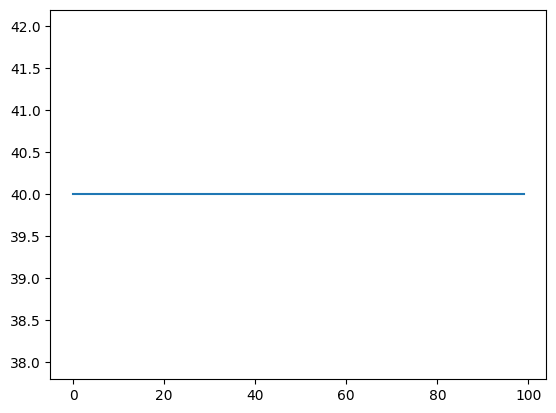

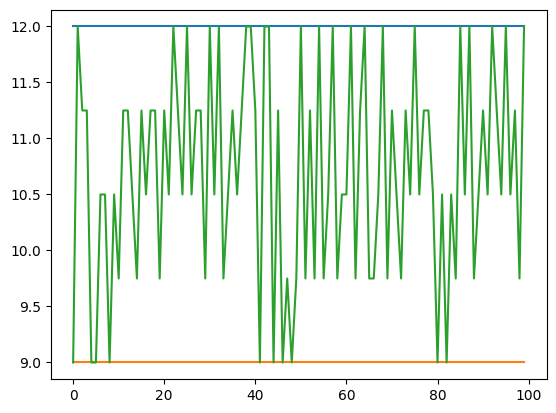

In [235]:
import matplotlib.pyplot as plt
k = 100
plt.plot(u_history[-k:])
plt.show()

plt.plot(qc_history[-k:])
plt.plot(qm_history[-k:])
plt.plot(q1_history[-k:])
plt.show()

### Correlations with shocks

In [236]:
k = 1000
np.corrcoef(u_history[-k:], q1_history[-k:])

array([[nan, nan],
       [nan,  1.]])

### Impulse Response

In [251]:
uidx = 0
u = 40 + Z[uidx]
u_impulse=[]
q1_impulse=[]
q2_impulse=[]
qm_impulse = []
qc_impulse = []
temperature_impulse=0.0001
state1 = 3
state2 = 3
# run Boltzmann Q-learning for a fixed number of episodes
num_episodes = 20
for episode in range(num_episodes):
    
    if episode==5:
        state1=0
    
    # Act greedily
    action1 = boltzmann_action_selection(Q1, state1, uidx, temperature_impulse)
    action2 = boltzmann_action_selection(Q2, state2, uidx, temperature_impulse)
  
    quantity1 = action2quantity[action1]
    quantity2 = action2quantity[action2]

    # Get rewards
    reward1 = cournot(u,v,w,n).cprofit(quantity1,quantity2)
    reward2 = cournot(u,v,w,n).cprofit(quantity2,quantity1)

    # update states
    state1 = action2
    state2 = action1
    
    # generate shock
    #uidx = whichidx(np.random.choice(Z,p=P[uidx]), Z)
    #u = 40 + Z[uidx]

    # record history
    u_impulse.append(u)
    q1_impulse.append(quantity1)
    q2_impulse.append(quantity2)
    qc_impulse.append(cournot(u,v,w,n).qc)
    qm_impulse.append(cournot(u,v,w,n).qm)

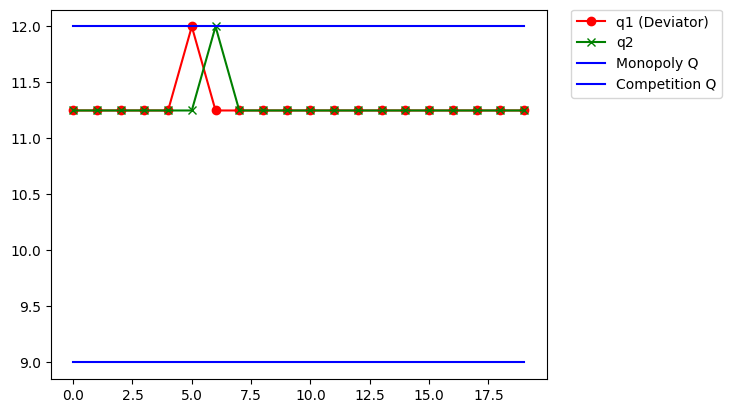

In [261]:
import matplotlib.pyplot as plt
plt.plot(q1_impulse, '-o', c='r', label = 'q1 (Deviator)')
plt.plot(q2_impulse,  '-x', c='g', label = 'q2')
plt.plot(qm_impulse, 'b', label = 'Monopoly Q')
plt.plot(qc_impulse, 'b', label = 'Competition Q')
plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()